In [175]:
import numpy as np
import pandas as pd
##pandas display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 400)
pd.set_option('display.max_columns', 400)

from tqdm.notebook import tqdm
import re
import nltk
import spacy
import string
import seaborn as sns
import math
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords, wordnet
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import *
import sklearn.model_selection
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.ensemble import *
from sklearn.svm import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_extraction.text import *

import emot

[nltk_data] Downloading package wordnet to /home/victor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/victor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/victor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/victor/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


# Client support

# 1. Data extraction

In [176]:
brand = "amazon"

In [177]:
filename = "../../data/extraction_twint/tweets_data/data_service_clients/with_user_info/"+brand+".csv"

In [178]:
import csv
with open(filename, 'r') as f:
    reader = csv.reader(f)
    linenumber = 1
    try:
        for row in reader:
            linenumber += 1
    except Exception as e:
        print (("Error line %d: %s %s" % (linenumber, str(type(e)), e.message)))

In [179]:
full_df = pd.read_csv(filename, lineterminator='\n')


df = full_df[["tweet","reply_time",'tweets', 'following', 'followers', 'likes']].copy()
df= df.rename(columns={'tweet':'raw'})

In [180]:
full_df.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest', 'datetime',
       'reply_time', 'id_user', 'name_user', 'bio', 'location', 'url',
       'join_date', 'join_time', 'tweets', 'following', 'followers', 'likes',
       'media', 'private', 'verified', 'profile_image_url',
       'background_image'],
      dtype='object')

In [181]:
df.columns

Index(['raw', 'reply_time', 'tweets', 'following', 'followers', 'likes'], dtype='object')

In [182]:
full_df.head()

,Unnamed: 0,id,conversation_id,created_at,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,datetime,reply_time,id_user,name_user,bio,location,url,join_date,join_time,tweets,following,followers,likes,media,private,verified,profile_image_url,background_image
0,0,1224993770233401344,1223454687623446528,1580896248000,CET,1014406324585672704,1469amrinder,Amrinder singh,NaN,Wt a disgusting amazon ! @JeffBezos @AmitAgarwal . You provide a link where we can put up issue . Its very bad experience for us . @ZeeNews @aajtak @ndtv @htTweets,"['amazonhelp', 'jeffbezos', 'amitagarwal', 'zeenews', 'aajtak', 'ndtv', 'httweets']",[],[],0,0,0,[],[],https://twitter.com/1469Amrinder/status/1224993770233401344,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1014406324585672704', 'username': '1469Amrinder'}, {'user_id': '85741735', 'username': 'AmazonHelp'}, {'user_id': '15506669', 'username': 'JeffBezos'}, {'user_id': '1206909656603320320', 'username': 'AmitAgarwal'}, {'user_id': '18071358', 'username': 'ZeeNews'}, {'user_id': '42606652', 'username': 'aajtak'}, {'user_id': '37034483', 'username': 'ndtv'}, {'user_id': '36327407', 'username': 'htTweets'}]",NaN,NaN,NaN,NaN,2020-02-05 10:50:48,NaN,1014406324585672704,Amrinder singh,BCC Officer at NHM South-East District ND . Be the person who makes other feel special. Be known for your kindness and grace.,NaN,NaN,4 Jul 2018,12:11 AM,191,275,19,246,25,0,0,https://pbs.twimg.com/profile_images/1133263642529415168/dnOaI47E_400x400.jpg,https://pbs.twimg.com/profile_banners/1014406324585672704/1551265558/1500x500
1,12,1224991053838569472,1223454687623446528,1580895601000,CET,1014406324585672704,1469amrinder,Amrinder singh,NaN,A pic up boy come to my house for used product bt he not received. He didn’t know the issue and argument with my wife .,['amazonhelp'],[],[],1,0,0,[],[],https://twitter.com/1469Amrinder/status/1224991053838569472,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1014406324585672704', 'username': '1469Amrinder'}, {'user_id': '85741735', 'username': 'AmazonHelp'}]",NaN,NaN,NaN,NaN,2020-02-05 10:40:01,0 days 00:05:40.000000000,1014406324585672704,Amrinder singh,BCC Officer at NHM South-East District ND . Be the person who makes other feel special. Be known for your kindness and grace.,NaN,NaN,4 Jul 2018,12:11 AM,191,275,19,246,25,0,0,https://pbs.twimg.com/profile_images/1133263642529415168/dnOaI47E_400x400.jpg,https://pbs.twimg.com/profile_banners/1014406324585672704/1551265558/1500x500
2,3271,1224231313172860928,1223454687623446528,1580714464000,CET,1014406324585672704,1469amrinder,Amrinder singh,NaN,"I m not getting your point. Wt will i do for replacement or money back ?\nSorry i will not purchase anything from amazon next time . #Meresegltihogei , next time kisi se nhi hone du ga# amazon meri bhool#",['amazonhelp'],[],[],1,0,0,['#meresegltihogei'],[],https://twitter.com/1469Amrinder/status/1224231313172860928,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1014406324585672704', 'username': '1469Amrinder'}, {'user_id': '85741735', 'username': 'AmazonHelp'}]",NaN,NaN,NaN,NaN,2020-02-03 08:21:04,0 days 00:06:35.000000000,1014406324585672704,Amrinder singh,BCC Officer at NHM South-East District ND . Be the person who makes other feel special. Be known for your kindness and grace.,NaN,NaN,4 Jul 2018,12:11 AM,191,275,19,246,25,0,0,https://pbs.twimg.com/profile_images/1133263642529415168/dnOaI47E_400x400.jpg,https://pbs.twimg.com/profile_banners/1014406324585672704/1551265558/1500x500
3,3992,1224021540569665536,1223454687623446528,1580664451000,CET,1014406324585672704,1469amrinder,Amrinder singh,NaN,"I think you don’t have dignity of valuable customers. Wt a network ! You couldn’t accessible my problem & not pass it to concerned support team . Unbelievable torcher , mentaly also wasting

In [183]:
sum(df.reply_time.isnull())

1534

In [184]:
df.shape

(6290, 6)

In [185]:
#reply time to timedelta
df['reply_time']=df['reply_time'].map(pd.to_timedelta)

#reply time in minutes
df['reply_time']=df['reply_time'].map(lambda x: x.days*1440 + x.seconds//60)

In [186]:
df.dtypes

raw            object
reply_time    float64
tweets          int64
following       int64
followers       int64
likes           int64
dtype: object

In [187]:
df["raw"] = df["raw"].astype('str')

In [188]:
df["direct_mention"] = df["raw"].apply(lambda x: "@AmazonHelp" in x)

In [189]:
df["len_text"] = df["raw"].apply(len)

In [190]:
##SENTIMENT ANALYSIS
from textblob import TextBlob
text = "Literally about to cancel Amazon Prime. Pretty much the only reason being the removal of Seinfeld! Sorry @primevideouk @AmazonHelp"
text = "I love that"

from textblob.sentiments import NaiveBayesAnalyzer

opinion = TextBlob(text, analyzer=NaiveBayesAnalyzer())
opinion.sentiment
opinion.sentiment.classification == 'pos'

True

In [191]:
tqdm.pandas()
analyzer=NaiveBayesAnalyzer()
df["positive_sentiment"] = df["raw"].progress_apply(lambda x:  TextBlob(x, analyzer=analyzer).sentiment.classification == 'pos')

In [192]:
df.head(30)

,raw,reply_time,tweets,following,followers,likes,direct_mention,len_text,positive_sentiment
0,Wt a disgusting amazon ! @JeffBezos @AmitAgarwal . You provide a link where we can put up issue . Its very bad experience for us . @ZeeNews @aajtak @ndtv @htTweets,NaN,191,275,19,246,False,163,False
1,A pic up boy come to my house for used product bt he not received. He didn’t know the issue and argument with my wife .,5.0,191,275,19,246,False,119,True
2,"I m not getting your point. Wt will i do for replacement or money back ?\nSorry i will not purchase anything from amazon next time . #Meresegltihogei , next time kisi se nhi hone du ga# amazon meri bhool#",6.0,191,275,19,246,False,204,True
3,"I think you don’t have dignity of valuable customers. Wt a network ! You couldn’t accessible my problem & not pass it to concerned support team . Unbelievable torcher , mentaly also wasting of time , money .",3.0,191,275,19,246,False,207,True
4,I am already shared information on link which is provided by you. And also a mail received from amazon team but nobody pic up came for used product. Pls let me know when will it replace?,42.0,191,275,19,246,False,186,False
5,& pls tell me when amazon pic up old & used shoes from my address? & replacement status?,5.0,191,275,19,246,False,88,True
6,I have already share all information on your link which is provided by you . So pls check and resolve my problem on urgent base . We feel harassed from last two weeks .its very upsetting moment for us . We open the box and get old shoes with dusty.,9.0,191,275,19,246,False,248,True
7,Pls find attachment... this is my detail pic.twitter.com/aBpjt1O0cS,2.0,191,275,19,246,False,67,True
8,Your team not assist thats why i use social platform. Ask your team about my order details . Why we are sufferer . @ZeeNewsHindi @ndtv @htTweets,6.0,191,275,19,246,False,144,True
9,How many time i will share detail ? . I am not a animal who live in jungl.. i have lot of work so you can take my order detail from attachment. Disgusting! @JeffBezos pic.twitter.com/xQV3KQXEt9,1.0,191,275,19,246,False,193,True


In [193]:
df.direct_mention.value_counts()

False    4629
True     1661
Name: direct_mention, dtype: int64

# 2. Pre-processing

In [194]:
df['has_reply'] = df['reply_time'].map(lambda x : not(math.isnan(x)))

In [195]:
df['has_reply'].value_counts()

True     4756
False    1534
Name: has_reply, dtype: int64

In [17]:
count_class_false, count_class_true = df['has_reply'].value_counts()
print(count_class_true, count_class_false)
count_class=min(count_class_true, count_class_false)

# Divide by class
df_class_true = df[df['has_reply'] == True]
df_class_false = df[df['has_reply'] == False]

df_class_false_under = df_class_false.sample(count_class)
df_class_true_under = df_class_true.sample(count_class)
df = pd.concat([df_class_false_under, df_class_true_under], axis=0)

count_class_false, count_class_true = df['has_reply'].value_counts()
print(count_class_true, count_class_false)

1534 4756
1534 1534


### Change text

In [196]:
import string

In [197]:
def remove_uppercase(text):
    return text.lower()
    
def remove_punctuation(text):
    """custom function to remove the punctuation"""  
    PUNCT_TO_REMOVE = string.punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

def remove_stopwords(text):
    """custom function to remove the stopwords"""
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def remove_frequent_words(text):
    print(text)
    FREQWORDS = get_frequent_words(df)
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

# def remove_urls(text):
#     url_pattern = re.compile(r'https?://\S+|www\.\S+')
#     expression = re.compile(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*')
#     text =  url_pattern.sub(r'', text)
#     return expression.sub(r'', text)

def remove_urls(text):
    words=[]
    for w in text.split(" "):
        if not(w.startswith("http") or w.startswith("www") or w.startswith("pic.twitter")):
            words+=[w]
    return ' '.join(words)


In [198]:
def get_frequent_words(column):
    cnt = Counter()
    for text in column.values:
        for word in text.split():
            cnt[word] += 1
    FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
    #RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-10-1:-1]])
    return FREQWORDS

get_frequent_words(df.raw)

{'@AmazonHelp', 'I', 'a', 'and', 'is', 'it', 'my', 'the', 'to', 'you'}

### Emoticons to words

In [199]:
def convert_emojis(text):
    #for emot in UNICODE_EMO:
     #   text = re.sub(r'('+emot+')', "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()), text)
    emo= emot.emoji(text)
    #print(emo)
    for i in range(len(emo['value'])):
        text = text.replace(emo['value'][i], emo['mean'][i]).replace(":","")
    return text

#text = "game is on 🔥 🔥 😭"
#print(convert_emojis(text))

### Chat words conversion

In [200]:
words = "../../source/slang.txt"
with open(words, 'r') as file:
    chat_words_str = file.read()

In [201]:
chat_words_map_dict = {}
chat_words_list = []

for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

#chat_words_conversion("one minute BRB")

In [202]:
#df.raw.apply(chat_words_conversion)

### Stemming

In [203]:
#not so good results

def stem_words(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

#df["stemmed"] = df["raw"].apply(lambda text: stem_words(text))
#df.head()

### Lemmatization

In [204]:
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}

def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) 
                     for word, pos in pos_tagged_text])
    #return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

#ex = "hello I am buying a fruit"
#lemmatize_words(ex)
#df["raw_lemmatized"] = df["raw"].apply(lambda text: lemmatize_words(text))
#df.head()

### Tokenisation

In [205]:
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

#df['tweet_tokenized']=df["tweet_lower"].apply(lambda text: tokenize(text))

# 3. Feature engineering

### Tweet length

In [206]:
df['length']=df['raw'].apply(lambda x:len(x)-x.count(" "))

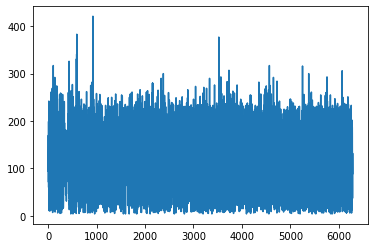

In [207]:
plt.plot(df.length)

In [208]:
plt.hist(df.likes_count, range=(0,5))

AttributeError: 'DataFrame' object has no attribute 'likes_count'

### Punctuation percentage

In [209]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text)-text.count(" ")),3)*100

df['punct']=df['raw'].apply(count_punct)

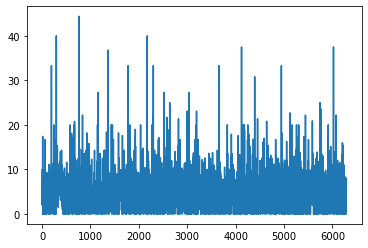

In [210]:
plt.plot(df.punct)

# 4. Data analysis

No handles with labels found to put in legend.


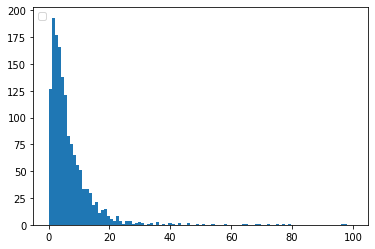

In [75]:
bins=np.linspace(0,100,100)
plt.hist(df['reply_time'],bins)
plt.legend(loc='upper left')
plt.show()

In [81]:
df[df["reply_time"]>0].reply_time.describe()

count    1507.000000
mean       33.106835
std       214.449915
min         1.000000
25%         3.000000
50%         5.000000
75%        10.000000
max      3340.000000
Name: reply_time, dtype: float64

In [33]:
# bins=np.linspace(0,110,40)
# plt.hist(df[df.has_reply==True]['replies_count'],bins, alpha=0.5, normed=False, label='Urgent')
# plt.hist(df[df.has_reply==False]['replies_count'],bins, alpha=0.5, normed=False, label='Non-Urgent')
# plt.legend(loc='upper left')
# plt.show()

Les features calculées n'ont pas l'air de différencier les tweets

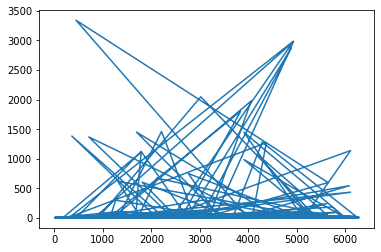

In [34]:
#Distribution of reply times
plt.plot(df['reply_time'])

# 5. Models

# 5A. Model creation 

## 1. Final pre-processing

In [211]:
df["clean_tweet"] = df["raw"].apply(lambda text: remove_uppercase(text))
df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_punctuation(text))
#df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_stopwords(text))
#df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_frequent_words(text))
df["clean_tweet"] = df["clean_tweet"].apply(lambda text: lemmatize_words(text))
df["clean_tweet"] = df["clean_tweet"].apply(lambda text: remove_urls(text))

In [212]:
df["clean_tweet_tokenized"] = df["clean_tweet"].apply(lambda text: tokenize(text))

In [213]:
len(df)

6290

In [214]:
df.head()

,raw,reply_time,tweets,following,followers,likes,direct_mention,len_text,positive_sentiment,has_reply,length,punct,clean_tweet,clean_tweet_tokenized
0,Wt a disgusting amazon ! @JeffBezos @AmitAgarwal . You provide a link where we can put up issue . Its very bad experience for us . @ZeeNews @aajtak @ndtv @htTweets,NaN,191,275,19,246,False,163,False,False,134,7.5,wt a disgusting amazon jeffbezos amitagarwal you provide a link where we can put up issue it very bad experience for u zeenews aajtak ndtv httweets,"[wt, a, disgusting, amazon, jeffbezos, amitagarwal, you, provide, a, link, where, we, can, put, up, issue, it, very, bad, experience, for, u, zeenews, aajtak, ndtv, httweets]"
1,A pic up boy come to my house for used product bt he not received. He didn’t know the issue and argument with my wife .,5.0,191,275,19,246,False,119,True,True,94,2.1,a pic up boy come to my house for used product bt he not receive he didn’t know the issue and argument with my wife,"[a, pic, up, boy, come, to, my, house, for, used, product, bt, he, not, receive, he, didn, t, know, the, issue, and, argument, with, my, wife]"
2,"I m not getting your point. Wt will i do for replacement or money back ?\nSorry i will not purchase anything from amazon next time . #Meresegltihogei , next time kisi se nhi hone du ga# amazon meri bhool#",6.0,191,275,19,246,False,204,True,True,165,4.2,i m not get your point wt will i do for replacement or money back sorry i will not purchase anything from amazon next time meresegltihogei next time kisi se nhi hone du ga amazon meri bhool,"[i, m, not, get, your, point, wt, will, i, do, for, replacement, or, money, back, sorry, i, will, not, purchase, anything, from, amazon, next, time, meresegltihogei, next, time, kisi, se, nhi, hone, du, ga, amazon, meri, bhool]"
3,"I think you don’t have dignity of valuable customers. Wt a network ! You couldn’t accessible my problem & not pass it to concerned support team . Unbelievable torcher , mentaly also wasting of time , money .",3.0,191,275,19,246,False,207,True,True,170,4.1,i think you don’t have dignity of valuable customer wt a network you couldn’t accessible my problem not pass it to concerned support team unbelievable torcher mentaly also waste of time money,"[i, think, you, don, t, have, dignity, of, valuable, customer, wt, a, network, you, couldn, t, accessible, my, problem, not, pass, it, to, concerned, support, team, unbelievable, torcher, mentaly, also, waste, of, time, money]"
4,I am already shared information on link which is provided by you. And also a mail received from amazon team but nobody pic up came for used product. Pls let me know when will it replace?,42.0,191,275,19,246,False,186,False,True,151,2.0,i be already share information on link which be provide by you and also a mail receive from amazon team but nobody pic up come for use product pls let me know when will it replace,"[i, be, already, share, information, on, link, which, be, provide, by, you, and, also, a, mail, receive, from, amazon, team, but, nobody, pic, up, come, for, use, product, pls, let, me, know, when, will, it, replace]"


### Create dataset

### Word2vec

In [39]:
import gensim

url = "embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin"
embeddings = gensim.models.KeyedVectors.load_word2vec_format(url, binary=True)

#### Create embeddings

In [215]:
text_features = pd.DataFrame() # creating empty final dataframe
stopwords = nltk.corpus.stopwords.words('english') # removing stop words
for doc in tqdm(df.clean_tweet): # looping through each document and cleaning it
    temp = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
    for word in doc.split(' '): # looping through each word of a single document and spliting through space
        if word not in stopwords: # if word is not present in stopwords then (try)
            try:
                word_vec = embeddings[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                temp = temp.append(pd.Series(word_vec), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
    doc_vector = temp.mean() # take the average of each column(w0, w1, w2,........w300)
    text_features = text_features.append(doc_vector, ignore_index = True) # append each document value to the final dataframe

text_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.068341,0.055734,-0.017373,0.044397,-0.059613,0.050806,0.004077,-0.017065,0.075073,0.120728,-0.093079,-0.144580,-0.057751,0.015302,-0.123718,0.144336,0.067236,0.074517,-0.090036,-0.148145,0.039056,-0.039786,0.070895,0.081412,-0.051093,-0.002045,-0.071160,0.079883,-0.031934,-0.072662,-0.020464,-0.011035,-0.065335,-0.054572,-0.044153,0.034351,0.017149,0.061523,0.023877,0.020154,0.024023,0.002490,0.081714,0.000391,-0.043896,-0.210217,0.061670,-0.027524,-0.065997,-0.048460,-0.064532,0.048584,0.036502,-0.043213,0.068262,-0.037157,-0.100354,-0.103072,-0.007990,-0.098535,0.041466,0.000049,-0.144983,0.002646,-0.064191,-0.118542,-0.102417,0.040637,-0.022205,0.027493,0.028775,0.057529,0.035315,0.018834,-0.083058,-0.094916,0.037488,0.098804,0.041956,0.083286,-0.059766,0.039609,0.062979,-0.007092,0.038519,-0.025140,-0.162744,0.127206,-0.031317,0.061484,0.067749,0.044849,-0.005170,-0.022992,-0.022818,-0.058997,0.052063,0.121759,0.166296,0.023322,-0.027161,0.082732,0.026343,-0.027441,0.014832,-0.028036,-0.060504,-0.051273,0.101471,-0.119153,-0.002173,-0.050636,0.006897,-0.009094,0.070991,-0.014014,0.029639,-0.071497,0.023236,0.010178,-0.033765,-0.045721,-0.089370,0.002881,-0.068713,0.016919,-0.120337,0.020020,0.053290,0.037488,-0.170898,-0.045972,-0.038260,0.088869,-0.030843,0.004007,0.016442,-0.019897,-0.032776,0.023999,0.125250,-0.063794,-0.011401,-0.036984,-0.034875,-0.075000,-0.080396,-0.005444,-0.025195,-0.117792,0.201392,0.001765,-0.117398,0.001424,-0.072350,-0.083755,0.015704,-0.037329,-0.056848,-0.061829,0.030359,0.027087,0.020117,0.015898,-0.014728,-0.124939,0.043976,-0.108569,-0.048490,0.053857,-0.089059,-0.001318,-0.018036,-0.012085,0.003687,0.051562,0.146497,-0.171875,0.048340,-0.016345,-0.033198,0.001587,-0.063443,0.023772,-0.032745,0.042456,-0.140356,0.012141,0.060422,0.040277,0.055859,-0.017688,0.064990,-0.009161,0.023706,0.151758,0.052966,-0.079422,-0.056155,-0.088672,-0.028503,0.093750,-0.082452,-0.058679,-0.022424,-0.022687,-0.091957,0.002588,-0.034204,0.056323,-0.029855,0.011719,-0.053381,0.069141,-0.136572,-0.003979,0.136475,-0.006769,0.045398,0.016418,-0.042761,0.028963,0.062933,0.101819,0.056921,-0.032081,0.065948,-0.003628,-0.019809,-0.029425,0.002132,0.013290,0.018756,-0.050659,0.048326,0.053961,0.011444,0.070215,0.100208,0.083008,0.098804,0.067334,0.070715,-0.088373,-0.012283,0.021460,-0.066257,0.169775,-0.042993,-0.065723,0.071814,0.009985,-0.038843,0.128925,0.132031,-0.153711,-0.048450,0.056384,0.000415,-0.099969,-0.003128,0.016479,0.049182,0.003503,0.071118,0.110382,-0.010999,-0.035004,-0.100946,-0.049304,-0.022610,0.081934,0.089160,0.013351,0.100043,-0.053680,-0.019403,-0.103833,-0.029161,0.089246,-0.004484,-0.049146,0.015479,0.112061,-0.075684,-0.042945,-0.120801,0.019775,-0.025403,-0.059552,0.004413,0.124463,-0.063049,0.096151,-0.099756,-0.065771,-0.051367,-0.128943,-0.026352,-0.006451
1,0.081652,0.011393,0.030782,0.044159,-0.024816,0.0

#### Save to csv

In [216]:
text_features.to_csv("embeddings/"+brand+".csv",)

#### Load from csv

In [45]:
text_features = pd.read_csv("embeddings/"+brand+".csv", index_col=0)
text_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0.032778,0.055020,0.000197,0.103366,-0.066840,-0.009440,0.017565,-0.091634,0.217027,0.118401,-0.040771,-0.113118,-0.018460,-0.055991,-0.081045,0.176276,0.099962,0.053060,-0.051487,-0.034092,0.008108,0.003330,0.084269,0.059353,0.015815,0.019016,-0.027344,0.102531,-0.026001,-0.043620,-0.017827,0.051561,-0.052619,-0.011355,0.061276,-0.023366,0.047936,-0.007751,0.090657,0.001492,0.137370,-0.089084,0.206760,-0.093940,-0.002102,-0.071855,-0.016249,-0.055149,-0.070367,-0.068983,0.002455,0.001987,-0.000509,-0.049484,0.013740,0.049344,-0.107096,-0.059139,0.041765,-0.080098,-0.031114,0.098511,-0.064426,-0.002346,-0.064806,-0.076009,0.005692,0.065030,-0.130100,-0.020094,0.086941,0.133348,0.071815,0.042006,-0.165419,-0.066956,0.048448,0.017063,0.004846,0.082818,0.023492,0.121894,0.030023,0.009481,-0.059411,-0.099521,-0.066962,0.201552,0.075005,0.003798,0.081163,0.054959,-0.007107,-0.075433,-0.027859,-0.090690,0.065443,0.077420,0.008993,-0.035292,-0.122450,0.069160,0.034337,-0.012560,-0.048815,0.012641,-0.001804,-0.075860,0.079217,-0.122192,-0.055257,-0.097440,0.045571,0.030436,0.151747,-0.081285,0.081409,-0.107355,0.079766,0.082340,-0.106177,0.016737,-0.079576,-0.014784,0.011230,0.035834,-0.068590,0.000787,0.064894,0.035075,-0.047445,-0.120511,0.002740,0.014025,-0.087029,-0.116204,-0.019938,0.006924,-0.008870,0.016493,0.105652,-0.140028,0.059197,0.009386,0.055996,0.028273,-0.076213,0.000746,-0.133226,-0.067433,0.176629,0.022936,-0.059855,0.044020,-0.068183,-0.014048,0.027262,-0.028741,-0.120103,-0.017809,-0.057172,0.059048,0.099284,0.055908,0.012017,-0.116319,0.062297,-0.107459,-0.033262,0.102865,-0.128194,0.111898,-0.061049,-0.075412,-0.072930,0.006890,0.138150,-0.198086,0.005222,-0.000814,-0.038656,-0.090739,0.066650,-0.076511,0.054023,0.006136,-0.102214,0.009128,0.028703,0.060225,-0.011732,-0.038640,0.070126,0.071343,0.031338,-0.021703,0.012099,-0.016890,-0.022563,-0.046288,0.002279,0.068237,-0.052741,0.027250,0.065294,0.018850,-0.093859,0.073110,-0.005724,0.069507,0.001221,0.132745,-0.003635,0.020671,-0.140869,0.045813,0.175836,-0.037333,-0.034741,0.012397,-0.023226,-0.023214,0.029819,0.076772,0.094238,-0.093018,0.046760,0.001112,0.069038,0.020291,-0.026082,-0.096680,0.000678,-0.014377,0.046383,0.063551,0.034044,-0.099989,0.081462,0.001316,0.005893,0.027642,-0.043210,-0.199002,-0.031169,-0.059191,0.051459,0.061340,-0.109304,0.055718,0.005737,0.078722,0.060781,0.040478,0.073574,-0.126180,-0.001081,0.080797,0.073391,-0.095573,-0.032227,0.014384,-0.062617,-0.030694,-0.025621,0.115940,0.034397,-0.034946,0.042182,-0.003479,-0.024658,0.061985,0.156467,-0.040270,0.047560,-0.139720,-0.131531,-0.021823,-0.015805,0.052612,0.025635,0.015686,-0.014983,0.043998,-0.003432,0.046251,-0.120599,-0.041073,-0.097263,-0.092082,-0.012472,0.064616,-0.106472,0.029378,0.035482,-0.009684,-0.017307,-0.039076,0.007684,-0.053059
1,0.054037,-0.027292,-0.068691,0.066572,-0.032168,0.019752,-0.0

In [217]:
for col in text_features.columns:
    text_features[col]=text_features[col].apply(lambda x: 0 if np.isnan(x) else x)

### TfIDF embedding

In [44]:
#vectorizer = CountVectorizer(max_features = 3000)
vectorizer = TfidfVectorizer(max_features = 3000)
text_features = vectorizer.fit_transform(df.clean_tweet).toarray()

### Other features & concatenation

In [218]:
#other_features = full_df[["replies_count","retweets_count","likes_count"]]
other_features = df[['tweets', 'following', 'followers', 'likes','direct_mention', 'punct', 'len_text', 'positive_sentiment']]
for col in other_features.columns:
    other_features[col]=other_features[col].apply(lambda x: 0 if np.isnan(x) else int(x))

/home/victor/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [219]:
text_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,-0.068341,0.055734,-0.017373,0.044397,-0.059613,0.050806,0.004077,-0.017065,0.075073,0.120728,-0.093079,-0.144580,-0.057751,0.015302,-0.123718,0.144336,0.067236,0.074517,-0.090036,-0.148145,0.039056,-0.039786,0.070895,0.081412,-0.051093,-0.002045,-0.071160,0.079883,-0.031934,-0.072662,-0.020464,-0.011035,-0.065335,-0.054572,-0.044153,0.034351,0.017149,0.061523,0.023877,0.020154,0.024023,0.002490,0.081714,0.000391,-0.043896,-0.210217,0.061670,-0.027524,-0.065997,-0.048460,-0.064532,0.048584,0.036502,-0.043213,0.068262,-0.037157,-0.100354,-0.103072,-0.007990,-0.098535,0.041466,0.000049,-0.144983,0.002646,-0.064191,-0.118542,-0.102417,0.040637,-0.022205,0.027493,0.028775,0.057529,0.035315,0.018834,-0.083058,-0.094916,0.037488,0.098804,0.041956,0.083286,-0.059766,0.039609,0.062979,-0.007092,0.038519,-0.025140,-0.162744,0.127206,-0.031317,0.061484,0.067749,0.044849,-0.005170,-0.022992,-0.022818,-0.058997,0.052063,0.121759,0.166296,0.023322,-0.027161,0.082732,0.026343,-0.027441,0.014832,-0.028036,-0.060504,-0.051273,0.101471,-0.119153,-0.002173,-0.050636,0.006897,-0.009094,0.070991,-0.014014,0.029639,-0.071497,0.023236,0.010178,-0.033765,-0.045721,-0.089370,0.002881,-0.068713,0.016919,-0.120337,0.020020,0.053290,0.037488,-0.170898,-0.045972,-0.038260,0.088869,-0.030843,0.004007,0.016442,-0.019897,-0.032776,0.023999,0.125250,-0.063794,-0.011401,-0.036984,-0.034875,-0.075000,-0.080396,-0.005444,-0.025195,-0.117792,0.201392,0.001765,-0.117398,0.001424,-0.072350,-0.083755,0.015704,-0.037329,-0.056848,-0.061829,0.030359,0.027087,0.020117,0.015898,-0.014728,-0.124939,0.043976,-0.108569,-0.048490,0.053857,-0.089059,-0.001318,-0.018036,-0.012085,0.003687,0.051562,0.146497,-0.171875,0.048340,-0.016345,-0.033198,0.001587,-0.063443,0.023772,-0.032745,0.042456,-0.140356,0.012141,0.060422,0.040277,0.055859,-0.017688,0.064990,-0.009161,0.023706,0.151758,0.052966,-0.079422,-0.056155,-0.088672,-0.028503,0.093750,-0.082452,-0.058679,-0.022424,-0.022687,-0.091957,0.002588,-0.034204,0.056323,-0.029855,0.011719,-0.053381,0.069141,-0.136572,-0.003979,0.136475,-0.006769,0.045398,0.016418,-0.042761,0.028963,0.062933,0.101819,0.056921,-0.032081,0.065948,-0.003628,-0.019809,-0.029425,0.002132,0.013290,0.018756,-0.050659,0.048326,0.053961,0.011444,0.070215,0.100208,0.083008,0.098804,0.067334,0.070715,-0.088373,-0.012283,0.021460,-0.066257,0.169775,-0.042993,-0.065723,0.071814,0.009985,-0.038843,0.128925,0.132031,-0.153711,-0.048450,0.056384,0.000415,-0.099969,-0.003128,0.016479,0.049182,0.003503,0.071118,0.110382,-0.010999,-0.035004,-0.100946,-0.049304,-0.022610,0.081934,0.089160,0.013351,0.100043,-0.053680,-0.019403,-0.103833,-0.029161,0.089246,-0.004484,-0.049146,0.015479,0.112061,-0.075684,-0.042945,-0.120801,0.019775,-0.025403,-0.059552,0.004413,0.124463,-0.063049,0.096151,-0.099756,-0.065771,-0.051367,-0.128943,-0.026352,-0.006451
1,0.081652,0.011393,0.030782,0.044159,-0.024816,0.0

In [220]:
X=np.concatenate((text_features,other_features),axis=1)

In [221]:
# Choose value to predict
y = df.has_reply

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,random_state=44)

In [223]:
useless_variables = [
    full_df,
    df,
    X,
    y,
]
for v in useless_variables:
    del(v)

## 2. Vectorization

In [113]:
def build_model(mode):
    # Intent to use default paramaters for show case
    vect = None
    if mode == 'count':
        vect = CountVectorizer()
    elif mode == 'tf':
        vect = TfidfVectorizer(use_idf=False, norm='l2')
    elif mode == 'tfidf':
        vect = TfidfVectorizer()
    #add n-gram
    else:
        raise ValueError('Mode should be either count or tfidf')
    
    return Pipeline([
        ('vect', vect),
        ('clf' , LogisticRegression(solver='newton-cg',n_jobs=-1))
    ])

## 3. Choose model

### Random Forest

In [224]:
rf = RandomForestClassifier(n_estimators=100, verbose=1, n_jobs=4, class_weight={False: 0.1, True: 0.9})

import xgboost as xgb
rf=xgb.XGBClassifier(random_state=42,learning_rate=0.01)

In [225]:
rf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [226]:
y_pred = rf.predict(X_test)

In [227]:
model=rf

# 5B. Model evaluation

In [228]:
## PRINT SCORES

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


string = "RESULTATS \n \
         Accuracy : {accuracy}% \n \
Balanced Accuracy : {balanced_accuracy}% \n \
         F1 score : {f1}\n \
        Precision : {precision}% (how many selected items are relevant)\n \
           Recall : {recall}% (how many relevant items are selected)\n \
\n\n\
STATISTICS\n\
 Proportion of positives in test set    : {positives}%\n\
 Proportion of positives in predictions : {predicted_positives}%\
"

print(string.format(accuracy = round(100*accuracy,2),
                    balanced_accuracy = round(100*balanced_accuracy,2),
                    f1 = round(f1,4), 
                    precision = round(100*precision,2), 
                    recall = round(100*recall,2),
                    positives = round(100*y_test.sum()/len(y_test),2),
                    predicted_positives = round(100*y_pred.sum()/len(y_pred),2),
                   ))

RESULTATS 
          Accuracy : 76.79% 
 Balanced Accuracy : 54.37% 
          F1 score : 0.8646
         Precision : 77.67% (how many selected items are relevant)
            Recall : 97.49% (how many relevant items are selected)
 

STATISTICS
 Proportion of positives in test set    : 75.99%
 Proportion of positives in predictions : 95.39%


No handles with labels found to put in legend.


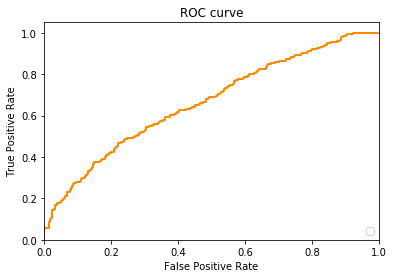

AUC : 0.66


In [229]:
## DISPLAY ROC CURVE
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc_score = round(auc(fpr, tpr),2)

plt.plot(fpr, tpr, color='darkorange',
         lw=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

print("AUC : {}".format(auc_score))

Confusion matrix, without normalization
[[ 34 268]
 [ 24 932]]
Normalized confusion matrix
[[0.11258278 0.88741722]
 [0.0251046  0.9748954 ]]


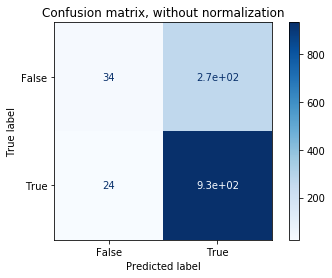

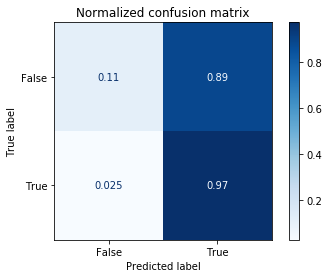

In [230]:
# CONFUSION MATRIX
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [122]:
#SAMPLES DE TOUTES LES CATEGORIES

##on recupere les tweets urgents manqués

#urgents and not urgents tweets index
positives = y_test[y_test==True].index
negatives = y_test[y_test==False].index

#correct and incorrect predictions index
is_prediction_correct = y_test==y_pred
correct_predictions   = is_prediction_correct[is_prediction_correct==True].index
incorrect_predictions = is_prediction_correct[is_prediction_correct==False].index

#true/false positive/negative index
true_positive_index  = correct_predictions.intersection(positives)
true_negative_index  = correct_predictions.intersection(negatives)
false_positive_index = incorrect_predictions.intersection(negatives)
false_negative_index = incorrect_predictions.intersection(positives)

In [101]:
df.loc[true_positive_index][['raw']]

,raw
40,"I keep getting told the same thing, that they will be in touch. I have been chasing this constantly as I am a prime customer and I need to buy things on my account but I can’t"
4632,"On Amazon IN help page for any assistance (including chat/phone) they want me to login first and like I mentioned it’s not my account, someone else’s using my email."
2586,"I pay for Amazon Unlimited. First my son's wouldn't play at all after Alexa repeats back what is going to play. Now it will repeat back but instead of playing, it will change what another Alexa is playing to it. I'll go to that one to fix and then my son's will start playing that"
3666,Provide link
2953,I’ve managed to get my kindle fire replacement and been sent a returns label but only for 1 kindle not2! Can I put them in the same package?
4858,"I was chatting with an agent, who transferred me to another SME. But the transfer did not happen, but the window was still live. I had to wait for 15mins to get a response from another agent."
5475,"@AmazonHelp , I have received an item this morning with an amazon delivery label on it that I did not order and is not on my order history."
1484,What about the Kindle?
5369,Please hurry up I have to place an order
3320,I spoke with someone. But I don’t think it’s being taken seriously. pic.twitter.com/lzYCr54GPC


In [102]:
df.loc[true_negative_index][['raw']]

,raw
5232,Well actually I was really talking to Ellen in particular..but..thanks anyway.
1489,"Hey @amazon @AmazonHelp I’m STILL waiting for y’all to call me about your package delivery drivers driving the wrong way down my street, DAILY. TWO WEEKS ago you said I’d get a call in 24 hours. So far I got empty promises."
1862,"I was asking the original tweeter, but I’m shocked you’ve responded before @TwitterSupport has"
1016,@AmazonHelp dm I have a question about my order
5267,"Amazon isn't exploiting people. They're just providing a platform for others to exploit people. In their minds, they're doing nothing wrong..."
394,The latter. Fix it @AmazonHelp https://twitter.com/Gbegz/status/1223013690812911619 …
2833,I was until I saw the above post ⬆️⬆️⬆️
1127,Ok I will thank you for your support
393,Because @AmazonHelp need to sort it out. Now. https://twitter.com/saintly1885/status/1223010641285459970 …
2745,As I have said I have tried that most recently half an hour ago but I either don’t get through or I get hung up on


In [103]:
df.loc[false_positive_index][['raw']]

,raw
3095,Another chance to what? Every year it gets worse! I see no improvement.
5905,"That doesn't help. My item was returned and acknowledged as being received. One day later AFTER the return, my card is charged and I can't access my money. How is this acceptable"
4926,⁦⁦@AmazonHelp⁩ something wrong with your chat support? I’ve been “on hold” for 15min for a fairly trivial issue (order didn’t arrive but is marked delivered). pic.twitter.com/EchKDrKabA
1580,Yes Plesee ..
4666,@AmazonHelp I am having issues with the Amazon Music app on my @Roku device. Was getting a connection error so deleted and reinstalled app but now after entering code at http://Amazon.com/code it says registered but still showing code to n Roku
4259,"If the package is damaged then the quality of the product isn't good enough. As a customer you are perfectly entitled to state this in a review. Amazon provide the product, charge a fee to deliver it. The driver is employed by amazon. What's the problem?"
3859,"@AmazonHelp @amazon let’s make it simple, may I bought the product for the some price or not.... I have a dream that @JeffBezos would read this message"
5676,😂 I was not expecting this on a Saturday morning that’s for sure!
1462,"Show me the investigation report or any proof that you have delivered the correct product ,@JeffBezos @AmazonHelp"
4463,"(1) This is why we’re not getting a refund. You’re clearly not interested. No one is taking ownership. The bottom line is: account was hacked, money was taken & item returned to Amazon at own cost following an Amazon Specialist’s instruction to return item - refund guaranteed..."


In [104]:
df.loc[false_negative_index][['raw']]

,raw
4525,@AmazonHelp we need a way of specifying on order that we don’t want parcels delivered by @Hermesparcels They are just useless and don’t turn up...
1992,Its purchased in july. Technician also not coming. They are putting reason whatever they want and I have to reschedule again. How many time have I reschedule without my fault? I don't want to buy amazon brand again. Pathetic product and service .... ever seen pic.twitter.com/w1MAUEgyt1
2486,Thanks dude
1425,"In the last week I've ordered 5 books from @AmazonUK @AmazonHelp with 4 being brand new and 1 used. The used book was perfect.\n\nThe other 4 ALL have damage. I don't want to return them, just Amazon need to do something about their logistics process."
1803,I want the further reply here only. I know your wrong intents. I want to expose the same that's why I want it here only. @JeffBezos @AmitAgarwal @AmazonHelp
1078,"@AmazonHelp Please, take a good look at my case. This is a never ending story with my issue. Why is this so much of a problem to you guys? I just sent an email with more information from @NintendoES."
300,"@amazonIN @Amazon @JeffBezos @amit803 \nHere's your response, does this help me at all??\n\nIt just says the things that you guys have been repeating over the past 8-10days.\n\nAgain the same question where's my product?? pic.twitter.com/6WXpQCgbJD"
6071,"@amazonIN\nYou are still fooling the people of this country. I don't want a reply. I want you to correct it. The MRP of the book is ₹699 not ₹799. \n\nThe Anarchy: The East India Company, Corporate Violence, and the Pillage of an Empire https://www.amazon.in/dp/1526618508/ref=cm_sw_r_cp_apa_i_LYnnEb1ZCPZ3V … pic.twitter.com/CgmhOZmIDl"
4416,"Amazon CS has dropped in quality, at least here in austria and since the introduction of Amazon logistics.\nYou clearly see and feel their effort to gain revenue by cutting logistics on behalf of the customers"
3616,@AramexHelp my package has been sat in Wisconsin since 23rd January no one can tell me why or when it’s going to arrive @AmazonHelp seem to think it’s in your hands and you’re blaming amazon. Anyone want to deliver my package at any point soon?!
